### Contenetal girls
-  this model is classifying the girl belongs to the country name
-  in this model four country girls are trained by Algorithm (Africa, India, China, SaudiArab)
-  this model is under development where in feature i will add 15 contenetal zone girls and claasifying the country where the girls belong to

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision 
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def imshow(inp, title=None):
    """ IMshow for Tensor"""
    inp=inp.numpy().transpose((1,2,0))
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.299,0.244,0.255])
    inp= std * inp + mean
    inp=np.clip(inp,0,1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [4]:
def data_load():
    data_transform=transforms.Compose([transforms.Resize([512,512]), transforms.ToTensor(), transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    data_dir='E:/image_model/people'
    image_datasets=datasets.ImageFolder(data_dir,transform=data_transform)
    train_loader=torch.utils.data.DataLoader(dataset=image_datasets, batch_size=2, shuffle=True)
    return train_loader,image_datasets
    

In [5]:
# model class
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.cnn1=nn.Conv2d(in_channels=3, out_channels=16,kernel_size=5,stride=1,padding=2)
        self.relu=nn.ReLU()
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        self.cnn2=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2=nn.ReLU()
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1=nn.Linear(32*128*128,7)
    
    def forward(self,x):
        out=self.cnn1(x)
        out=self.relu(out)
        out=self.maxpool1(out)
        out=self.cnn2(out)
        out=self.relu2(out)
        out=self.maxpool2(out)
        out=out.view(out.size(0),-1)
        out=self.fc1(out)
        return out

In [6]:
train_loader,image_datasets=data_load()

In [7]:
model=CNNModel()

In [8]:
criterion=nn.CrossEntropyLoss()
learning_rate=0.001
optimizer=optim.SGD(model.parameters(),lr=learning_rate)


In [9]:
# model training
num_epochs=5
iter=0
batch_size=2

for epoch in range(num_epochs):
    for i, (images, labels)in enumerate(train_loader):
        images=Variable(images)
        labels=Variable(labels)
        optimizer.zero_grad()
        output=model(images)
        loss=criterion(output, labels)
        loss.backward()
        optimizer.step()
        iter =iter +1
        print('Epoch [%d/%d],Iter [%d/%d] Loss : %.4f' %(epoch+1,num_epochs,i+1,len(image_datasets)//batch_size,loss[0]))
        


C:\Users\admin\Anaconda3\envs\pyt\lib\site-packages\ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch [1/5],Iter [1/30] Loss : 1.9366
Epoch [1/5],Iter [2/30] Loss : 6.6408
Epoch [1/5],Iter [3/30] Loss : 7.2170
Epoch [1/5],Iter [4/30] Loss : 1.5437
Epoch [1/5],Iter [5/30] Loss : 2.2779
Epoch [1/5],Iter [6/30] Loss : 1.9277
Epoch [1/5],Iter [7/30] Loss : 2.4021
Epoch [1/5],Iter [8/30] Loss : 1.4031
Epoch [1/5],Iter [9/30] Loss : 1.7900
Epoch [1/5],Iter [10/30] Loss : 2.3090
Epoch [1/5],Iter [11/30] Loss : 1.3887
Epoch [1/5],Iter [12/30] Loss : 1.6977
Epoch [1/5],Iter [13/30] Loss : 1.7389
Epoch [1/5],Iter [14/30] Loss : 1.4286
Epoch [1/5],Iter [15/30] Loss : 1.4553
Epoch [1/5],Iter [16/30] Loss : 1.5452
Epoch [1/5],Iter [17/30] Loss : 1.2941
Epoch [1/5],Iter [18/30] Loss : 1.8919
Epoch [1/5],Iter [19/30] Loss : 1.2969
Epoch [1/5],Iter [20/30] Loss : 1.2135
Epoch [1/5],Iter [21/30] Loss : 1.9126
Epoch [1/5],Iter [22/30] Loss : 1.3648
Epoch [1/5],Iter [23/30] Loss : 1.4139
Epoch [1/5],Iter [24/30] Loss : 1.7380
Epoch [1/5],Iter [25/30] Loss : 1.4440
Epoch [1/5],Iter [26/30] Loss : 1.

### testing

In [27]:
def data_load1():
    data_transform=transforms.Compose([transforms.Resize([512,512]), transforms.ToTensor(), transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    data_dir='E:/testimg'
    image_datasets=datasets.ImageFolder(data_dir,transform=data_transform)
    train_loader=torch.utils.data.DataLoader(dataset=image_datasets, batch_size=2, shuffle=True)
    return train_loader

In [28]:
train_loader22=data_load1()

In [29]:
imagex=train_loader22
print(imagex)

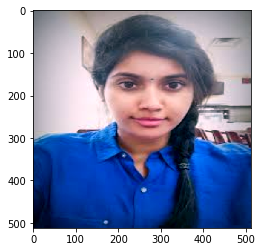

tensor([2])
prediction-- indian


In [30]:
labels_h=('africa','chinise','indian','saudi')
for i , (a,b) in enumerate(train_loader22):
    imshow(torchvision.utils.make_grid(a))
    images1=Variable(a)
    labels1=Variable(b)
    outputs1=model(a)
    _,predicted=torch.max(outputs1.data,1)
    print(predicted)
    print("prediction--", labels_h[predicted[0]])